This is a notebook Topic 3 of MLCourse.ai

https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

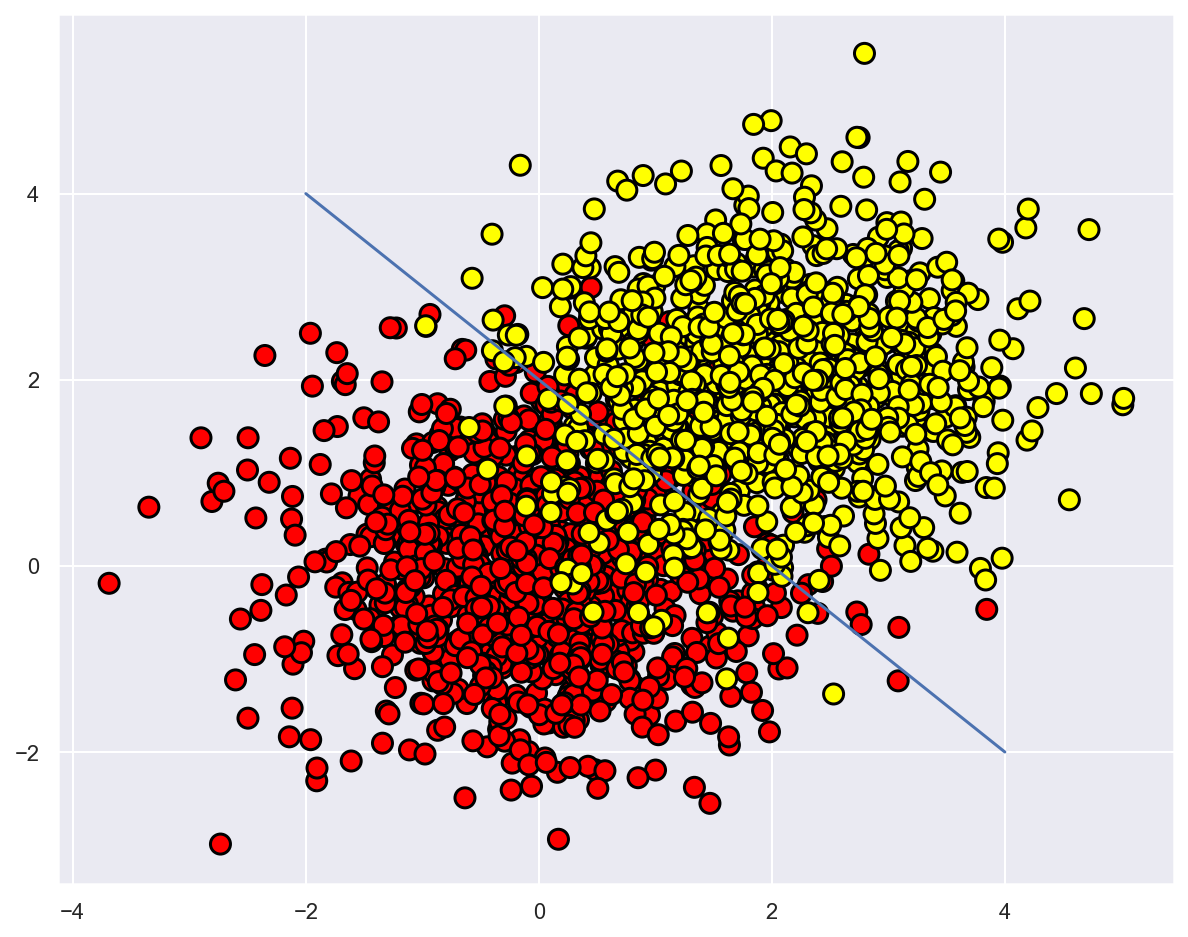

In [15]:
# first class
np.random.seed(107)
train_data = np.random.normal(size=(1000, 2))
train_labels = np.zeros(1000)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(1000, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(1000)]

plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

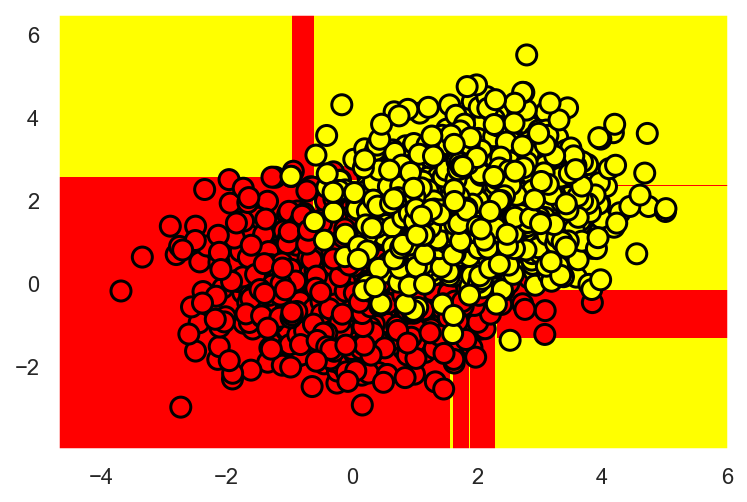

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10,
                                  random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
            cmap='autumn', edgecolors='black', linewidth=1.5);